In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")

In [27]:
# Open the pickle file in read mode and load the object from it
with open("results/experiment_result2.pickle", "rb") as f:
    my_loaded_object = pickle.load(f)

# Print the loaded object
# print(my_loaded_object['fidelity_history'])
mean_fidelity = [np.mean(fidelity) for fidelity in my_loaded_object['fidelity_history']]
mean_cost = [np.mean(cost) for cost in my_loaded_object['cost_history']]

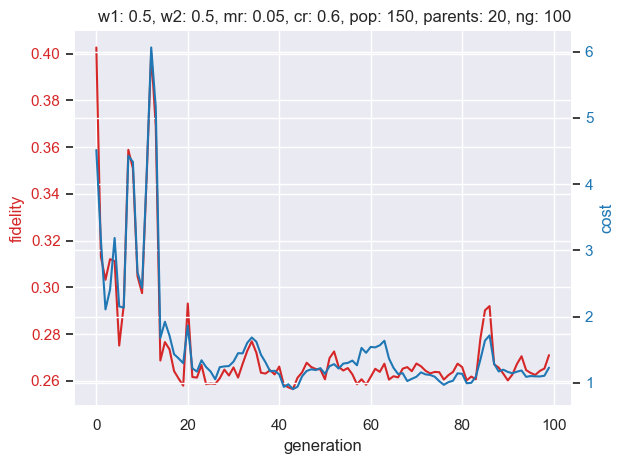

In [41]:
fig, ax1 = plt.subplots()
x = np.arange(0, 100, 1)

w1 = my_loaded_object['Hyperparameter']['w1']
w2 = my_loaded_object['Hyperparameter']['w2']
mutation_rate = my_loaded_object['Hyperparameter']['mutation_rate']
crossover_rate = my_loaded_object['Hyperparameter']['crossover_rate']
num_population = my_loaded_object['Hyperparameter']['num_population']
num_parents = my_loaded_object['Hyperparameter']['num_parents']
num_generation = my_loaded_object['Hyperparameter']['num_generation']

plt.title(f'w1: {w1}, w2: {w2}, mr: {mutation_rate}, cr: {crossover_rate}, pop: {num_population}, parents: {num_parents}, ng: {num_generation}', loc='right')

color = 'tab:red'
ax1.set_xlabel('generation')
ax1.set_ylabel('fidelity', color=color)
ax1.plot(x, mean_fidelity, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('cost', color=color)  # we already handled the x-label with ax1
ax2.plot(x, mean_cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [44]:
# Open the pickle file in read mode and load the object from it
with open("results/exp_HyperTune.pickle", "rb") as f:
    my_loaded_object = pickle.load(f)

# Print the loaded object
# print(my_loaded_object['fidelity_history'])
mean_fidelity = [np.mean(fidelity) for fidelity in my_loaded_object['fidelity_history']]
mean_cost = [np.mean(cost) for cost in my_loaded_object['cost_history']]

In [45]:
my_loaded_object

{'Experiment_name': 'exp_HyperTune.pickle',
 'Hyperparameters': {'w1': 0.5,
  'w2': 0.5,
  'mutation_rate': 0.15,
  'crossover_rate': 0.6,
  'num_population': 150,
  'num_parents': 30,
  'num_generation': 100},
 'fidelity_history': [[0.6386666666666667,
   0.33183333333333337,
   0.2538333333333333,
   0.4121666666666667,
   0.26816666666666666,
   0.2558333333333333,
   0.2776666666666666,
   0.5836666666666667,
   0.523,
   0.31283333333333335,
   0.2916666666666667,
   0.24400000000000002,
   0.2668333333333333,
   0.26433333333333336,
   0.2541666666666667,
   0.6113333333333333,
   0.448,
   0.44016666666666665,
   0.2725,
   0.3595,
   0.31033333333333335,
   0.39149999999999996,
   0.2708333333333333,
   0.2635,
   0.25583333333333336,
   0.2705,
   0.7208333333333334,
   0.25366666666666665,
   0.36500000000000005,
   0.497,
   0.6283333333333333,
   0.2856666666666667,
   0.26716666666666666,
   0.3903333333333333,
   0.48283333333333334,
   0.391,
   0.33816666666666667,
   0

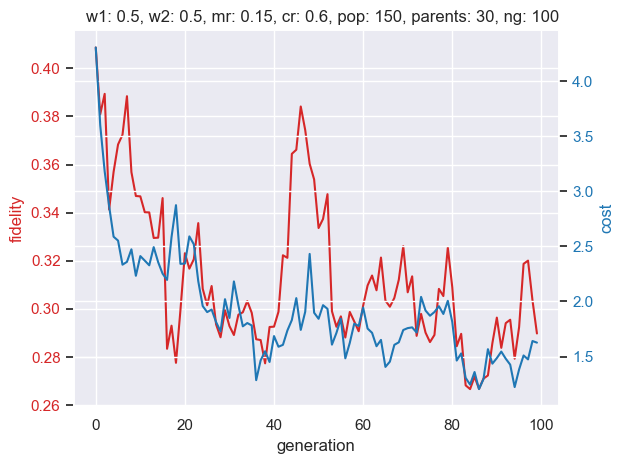

In [47]:
fig, ax1 = plt.subplots()
x = np.arange(0, 100, 1)

w1 = my_loaded_object['Hyperparameters']['w1']
w2 = my_loaded_object['Hyperparameters']['w2']
mutation_rate = my_loaded_object['Hyperparameters']['mutation_rate']
crossover_rate = my_loaded_object['Hyperparameters']['crossover_rate']
num_population = my_loaded_object['Hyperparameters']['num_population']
num_parents = my_loaded_object['Hyperparameters']['num_parents']
num_generation = my_loaded_object['Hyperparameters']['num_generation']

plt.title(f'w1: {w1}, w2: {w2}, mr: {mutation_rate}, cr: {crossover_rate}, pop: {num_population}, parents: {num_parents}, ng: {num_generation}', loc='right')

color = 'tab:red'
ax1.set_xlabel('generation')
ax1.set_ylabel('fidelity', color=color)
ax1.plot(x, mean_fidelity, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('cost', color=color)  # we already handled the x-label with ax1
ax2.plot(x, mean_cost, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

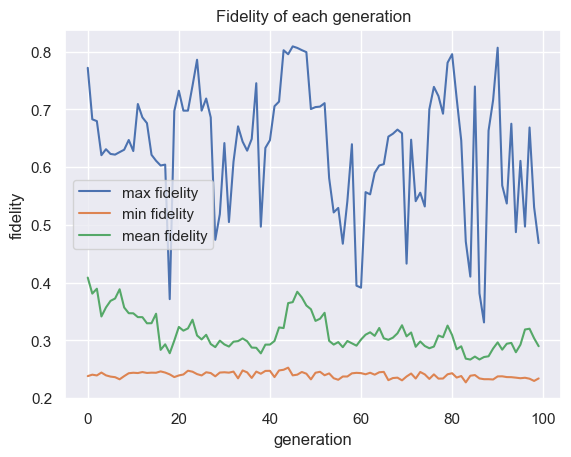

In [55]:
plt.title('Fidelity of each generation')
plt.xlabel('generation')
plt.ylabel('fidelity')
plt.plot(x, np.max(my_loaded_object['fidelity_history'], axis=1), label='max fidelity')
plt.plot(x, np.min(my_loaded_object['fidelity_history'], axis=1), label='min fidelity')
plt.plot(x, np.mean(my_loaded_object['fidelity_history'], axis=1), label='mean fidelity')
plt.legend()

In [24]:
def read_pickle(fileName, plotFC=False, plotF=False, plotC=False):
    with open(fileName, "rb") as f:
        my_loaded_object = pickle.load(f)
    
    x = np.arange(0, my_loaded_object['Hyperparameters']['num_generation'], 1)
    w1 = my_loaded_object['Hyperparameters']['w1']
    w2 = my_loaded_object['Hyperparameters']['w2']
    mutation_rate = my_loaded_object['Hyperparameters']['mutation_rate']
    crossover_rate = my_loaded_object['Hyperparameters']['crossover_rate']
    num_population = my_loaded_object['Hyperparameters']['num_population']
    num_parents = my_loaded_object['Hyperparameters']['num_parents']
    num_generation = my_loaded_object['Hyperparameters']['num_generation']
    # fidelity = my_loaded_object['fidelity_history']
    # cost = my_loaded_object['cost_history']

    mean_fidelity = [np.mean(fidelity) for fidelity in my_loaded_object['fidelity_history']]
    mean_cost = [np.mean(cost) for cost in my_loaded_object['cost_history']]

    if plotFC == True:
        fig, ax1 = plt.subplots()        
        plt.title(f'w1: {w1}, w2: {w2}, mr: {mutation_rate}, cr: {crossover_rate}, pop: {num_population}, parents: {num_parents}, ng: {num_generation}', loc='right')

        color = 'tab:red'
        ax1.set_xlabel('generation')
        ax1.set_ylabel('fidelity', color=color)
        ax1.plot(x, mean_fidelity, color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('cost', color=color)  # we already handled the x-label with ax1
        ax2.plot(x, mean_cost, color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    if plotF == True:
        ax[0].set_title('Fidelity of each generation')
        ax[0].set_xlabel('generation')
        ax[0].set_ylabel('fidelity')
        ax[0].plot(x, np.max(my_loaded_object['fidelity_history'], axis=1), label='max fidelity', color='tab:red')
        ax[0].plot(x, np.min(my_loaded_object['fidelity_history'], axis=1), label='min fidelity', color='tab:green')
        ax[0].plot(x, np.mean(my_loaded_object['fidelity_history'], axis=1), label='mean fidelity', color='tab:blue')
        ax[0].fill_between(x, np.max(my_loaded_object['fidelity_history'], axis=1), np.min(my_loaded_object['fidelity_history'], axis=1), alpha=0.2, label='range fidelity')
        ax[0].legend()

    if plotC == True:
        ax[1].set_title('Cost of each generation')
        ax[1].set_xlabel('generation')
        ax[1].set_ylabel('cost')
        ax[1].plot(x, np.max(my_loaded_object['cost_history'], axis=1), label='max cost', color='tab:red')
        ax[1].plot(x, np.min(my_loaded_object['cost_history'], axis=1), label='min cost', color='tab:green')
        ax[1].plot(x, np.mean(my_loaded_object['cost_history'], axis=1), label='mean cost', color='tab:blue')
        ax[1].fill_between(x, np.max(my_loaded_object['cost_history'], axis=1), np.min(my_loaded_object['cost_history'], axis=1), alpha=0.2, label='range cost')
        ax[1].legend()

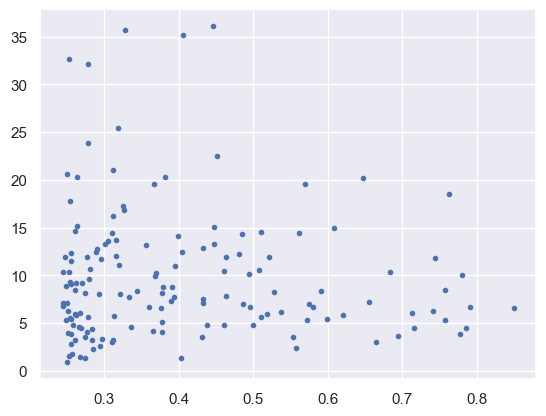

In [33]:
with open("results/exp_HyperTune1.pickle", "rb") as f:
    my_loaded_object = pickle.load(f)

plt.plot(my_loaded_object['fidelity_history'][0], my_loaded_object['cost_history'][0], '.')

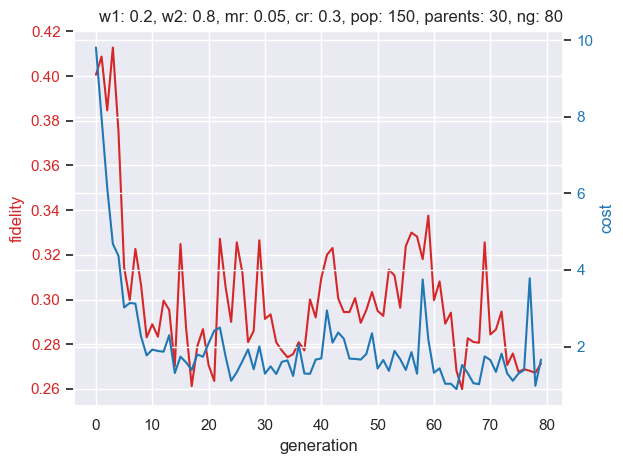

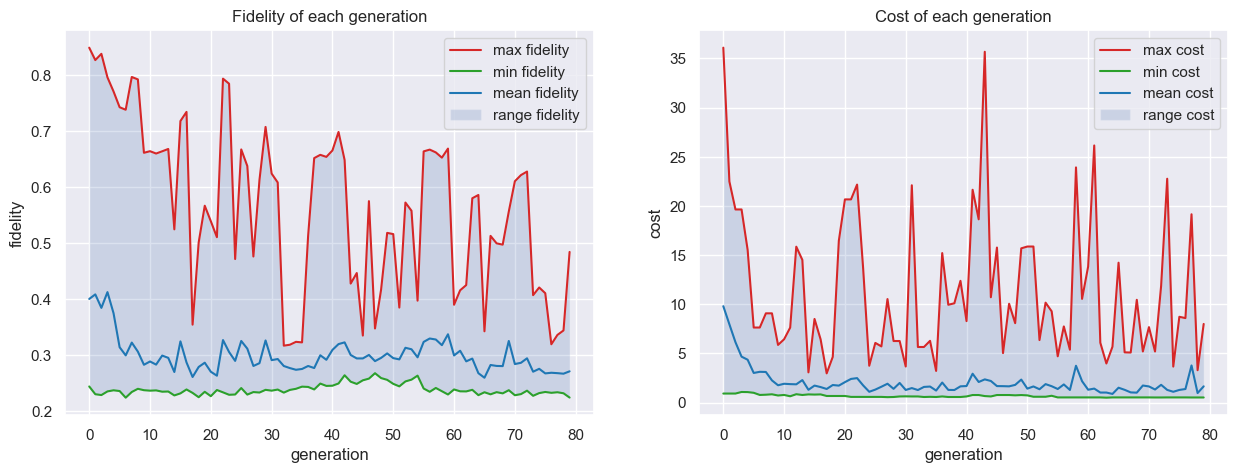

In [25]:
read_pickle(fileName='results/exp_HyperTune1.pickle', plotFC=True, plotF=True, plotC=True)

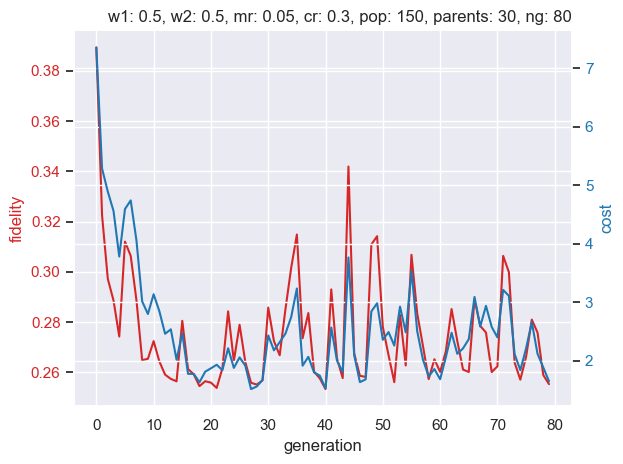

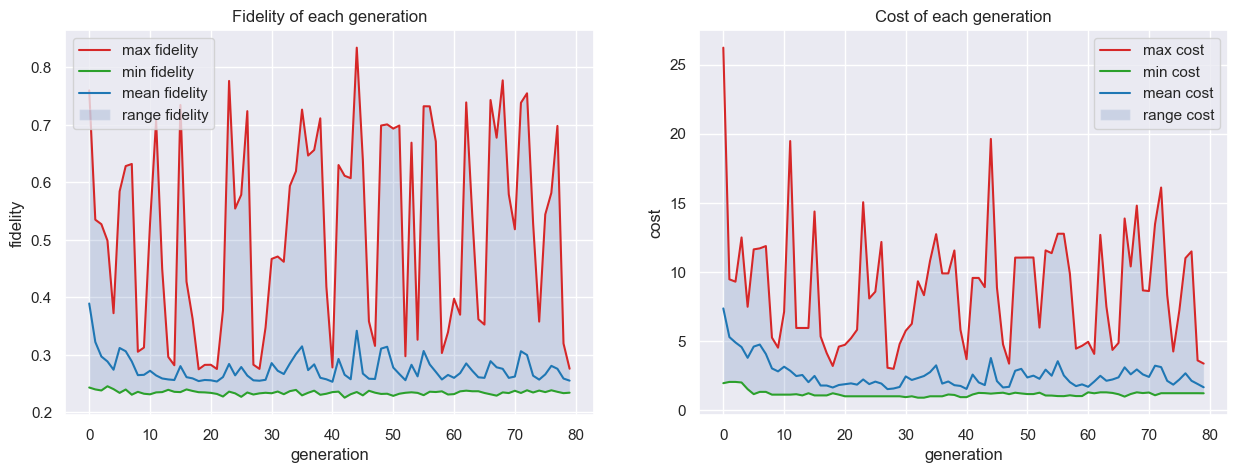

In [26]:
read_pickle(fileName='results/exp_HyperTune2.pickle', plotFC=True, plotF=True, plotC=True)

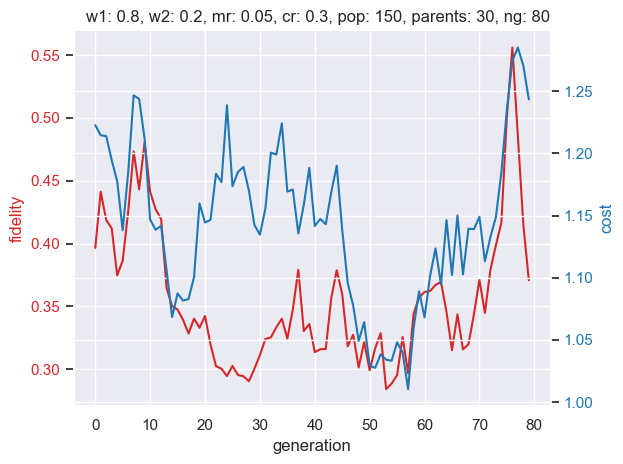

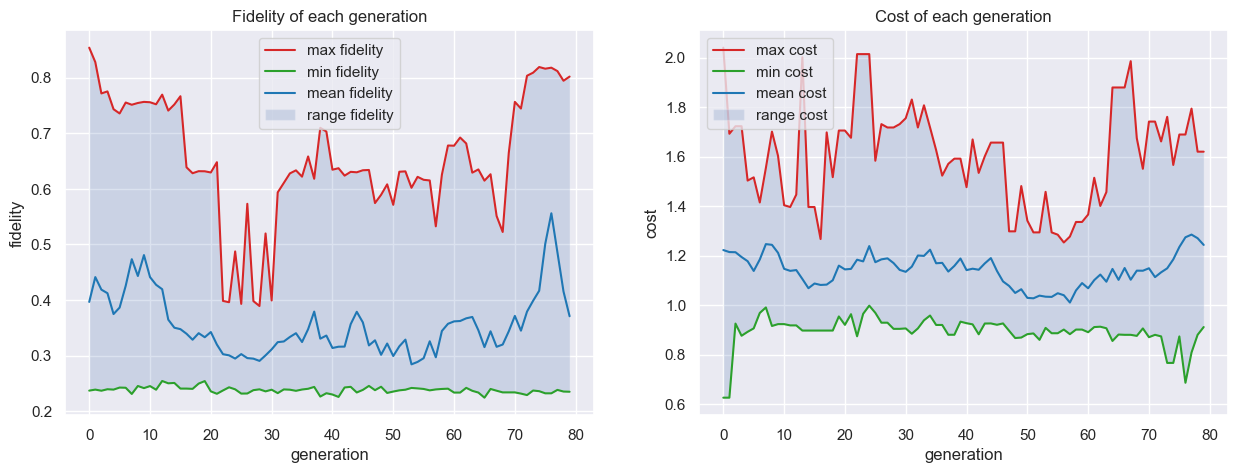

In [27]:
read_pickle(fileName='results/exp_HyperTune3.pickle', plotFC=True, plotF=True, plotC=True)

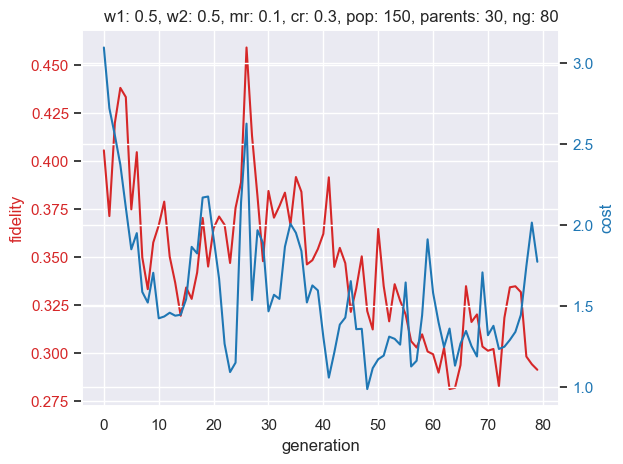

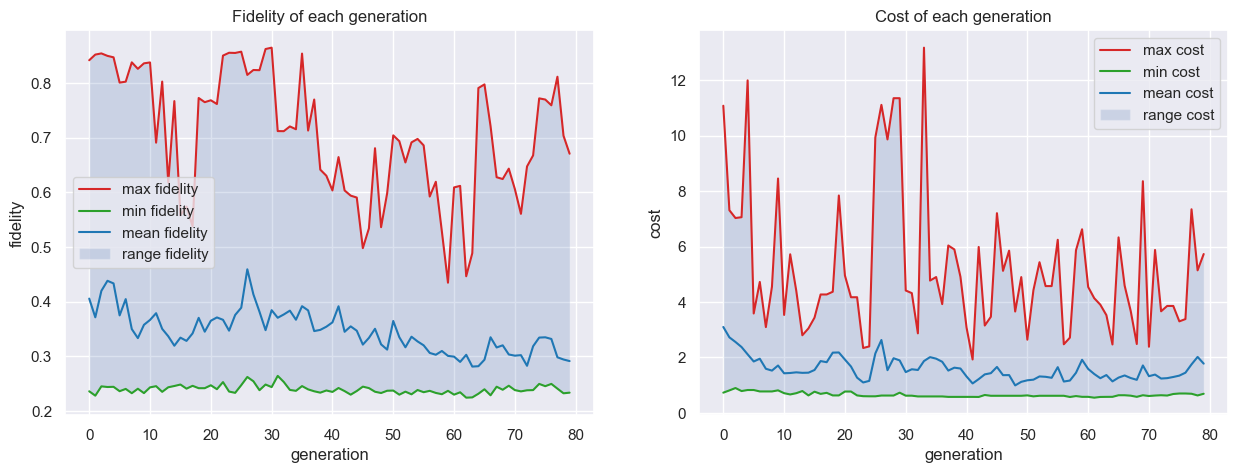

In [28]:
read_pickle(fileName='results/exp_HyperTune4.pickle', plotFC=True, plotF=True, plotC=True)

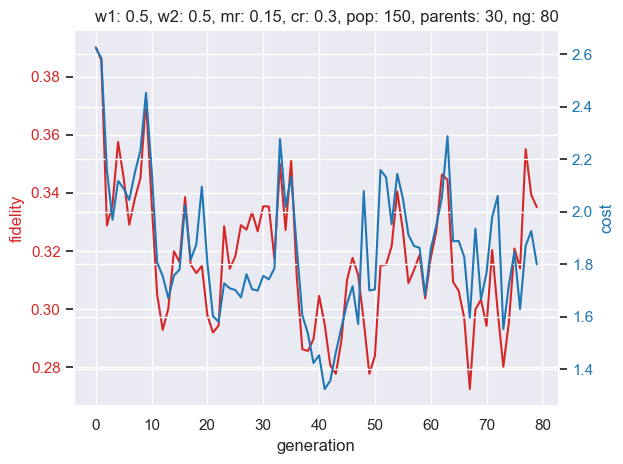

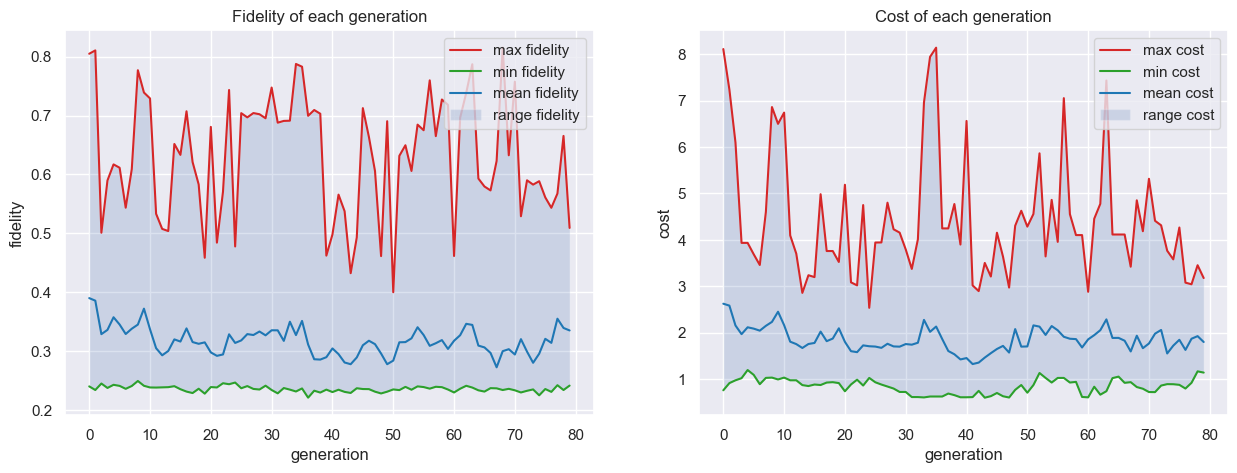

In [29]:
read_pickle(fileName='results/exp_HyperTune5.pickle', plotFC=True, plotF=True, plotC=True)

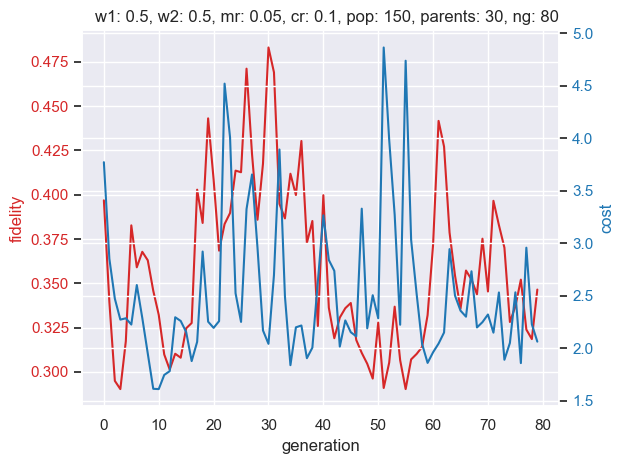

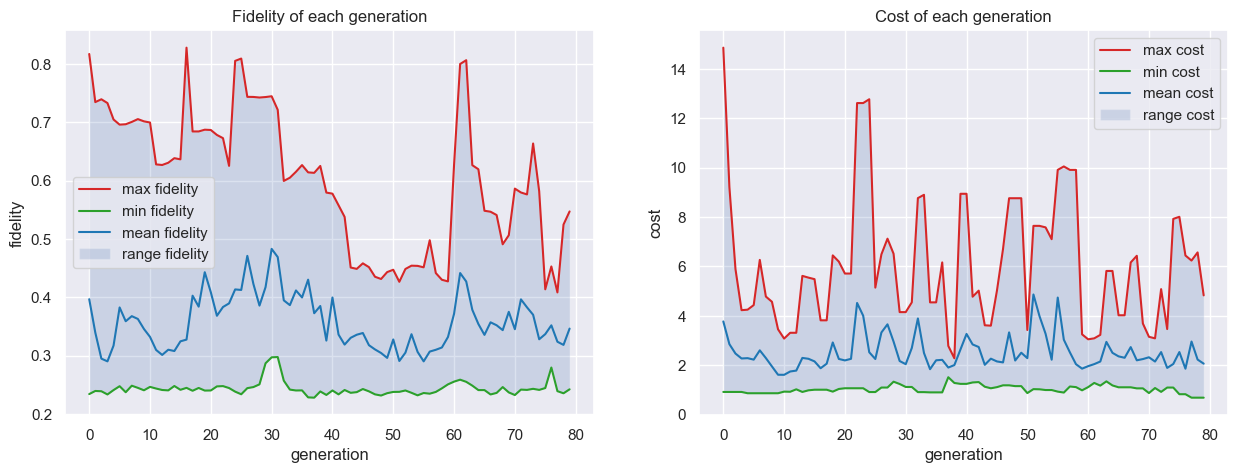

In [30]:
read_pickle(fileName='results/exp_HyperTune6.pickle', plotFC=True, plotF=True, plotC=True)

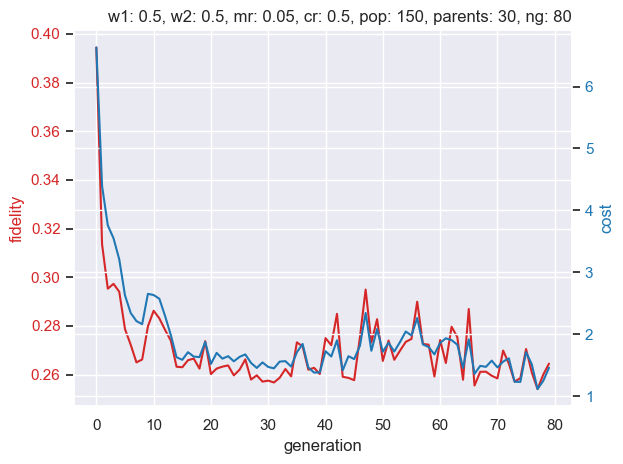

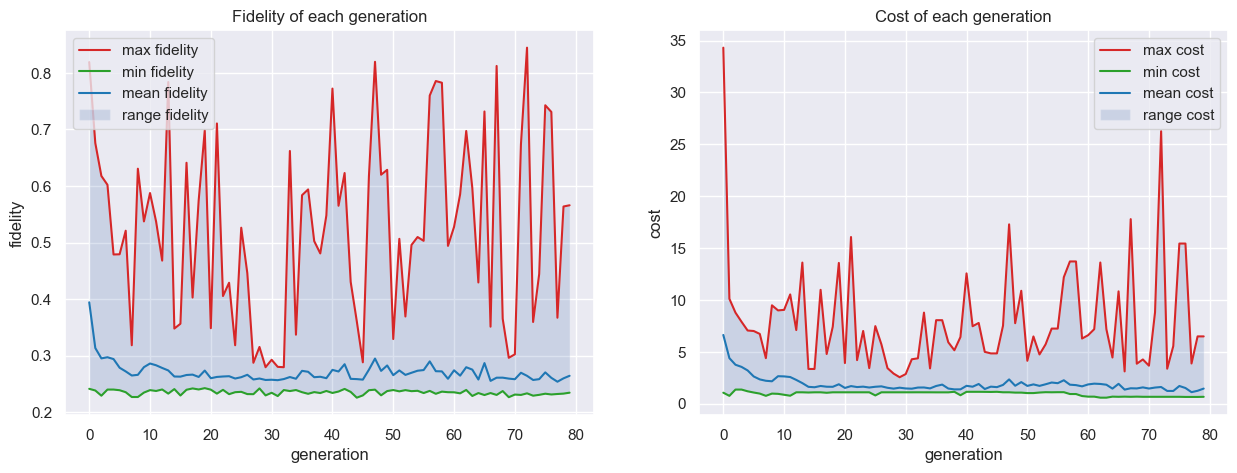

In [31]:
read_pickle(fileName='results/exp_HyperTune7.pickle', plotFC=True, plotF=True, plotC=True)